In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pdvega

In [2]:
%matplotlib inline

In [3]:
src_file = Path.cwd() / "in" / "merged_adm_dis_2017_dups_removed_common_columns.csv"

In [4]:
df = pd.read_csv(src_file, parse_dates=[2, 25], na_values=["NA"])

In [5]:
df.head()

,Unnamed: 0,Client.Number,Form.Date,Sex.x,Race1,Number.of.arrests.in.past.30.days,Usual.living.situation,Number.of.self.help.programs.attended.in.past.30.days,Interaction.with.supportive.family.friends.in.past.30.days,Are.any.children.living.with.someone.else.due.to.CPS.court.order.or.other.action,...,Does.client.have.children,How.many.children,Currently.involved.with.CPS,CHSR.Dimension.1,CHSR.Dimension.2,CHSR.Dimension.3,CHSR.Dimension.4,CHSR.Dimension.5,CHSR.Dimension.6,number.hours
0,1,3949SAMC21739,2007-01-05,Male,African American,0.0,Dependent living,No attendance,Yes,Not applicable,...,Yes,3.0,No,NaN,NaN,NaN,NaN,NaN,NaN,40.0
1,2,9812WLLD23735,2007-01-16,Male,African American,0.0,Independent living,"Some attendance, but frequency unknown",Yes,Not applicable,...,Yes,1.0,No,Serious,NaN,Serious,Moderate,Serious,Moderate,40.0
2,3,5663MRDA26015,2007-01-29,Female,African American,0.0,Independent living,"Some attendance, but frequency unknown",Yes,Not applicable,...,Yes,1.0,No,Moderate,NaN,Extreme,Moderate,Serious,Moderate,8.0
3,4,6437CNCA28677,2007-01-30,Male,African American,0.0,Independent living,No attendance,Yes,Not applicable,...,Yes,2.0,No,Serious,NaN,Serious,Extreme,Extreme,Extreme,32.0
4,5,3982JNSB26103,2008-04-28,Male,African American,0.0,Independent living,No attendance,No,Not applicable,...,No,NaN,Not applicable,NaN,Minor,Serious,Serious,Moderate,Serious,49.0


In [6]:
df['Year'] = df['Form.Date'].dt.year

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.shape

(2836, 46)

In [9]:
df.dtypes

Client.Number                                                                               object
Form.Date                                                                           datetime64[ns]
Sex.x                                                                                       object
Race1                                                                                       object
Number.of.arrests.in.past.30.days                                                          float64
Usual.living.situation                                                                      object
Number.of.self.help.programs.attended.in.past.30.days                                       object
Interaction.with.supportive.family.friends.in.past.30.days                                  object
Are.any.children.living.with.someone.else.due.to.CPS.court.order.or.other.action            object
For.how.many.children.has.the.client.lost.parental.rights                                  float64
Number.of.

In [10]:
df[['CHSR.Dimension.1', 'CHSR.Dimension.2', 'CHSR.Dimension.3',
    'CHSR.Dimension.4', 'CHSR.Dimension.5', 'CHSR.Dimension.6']].apply(pd.value_counts)

,CHSR.Dimension.1,CHSR.Dimension.2,CHSR.Dimension.3,CHSR.Dimension.4,CHSR.Dimension.5,CHSR.Dimension.6
Extreme,19,7,37,100,160,157
Extreme problem,7,4,17,43,153,200
Minor,263,677,564,499,549,472
Minor problem,167,351,169,144,92,59
Moderate,178,283,707,561,534,446
Moderate problem,102,84,356,213,159,95
No problem,391,241,49,123,46,39
Serious,156,115,448,487,628,614
Serious problem,36,21,114,208,275,217
Unable to assess,101,100,94,68,74,192


Score scale:
- Extreme - 5
- Serious - 4
- Moderate - 3
- Minor - 2
- No problem - 1
- Unable to asses - 0

In [11]:
# Keep NaNs in here for now
df['Reason.for.Discharge'].value_counts(dropna=False)

Completed program                      1267
Patient left                            521
Patient left without staff approval     266
Staff requested                         178
Patient conduct (behavioral)            177
Transferred                             122
Transferred to other program             73
Assessed as inappropriate                69
Incarcerated                             57
NaN                                      51
Other                                    47
Death                                     8
Name: Reason.for.Discharge, dtype: int64

In [12]:
df["Completed"] = 0
df['Completed'] = np.where(df['Reason.for.Discharge'].str.contains('Completed program', na=False), 1,  0)

In [13]:
df.loc[df['Reason.for.Discharge'].str.contains('Transferred', na=False), 'Completed'] = 1

In [14]:
df['Completed'].value_counts()

1    1462
0    1374
Name: Completed, dtype: int64

In [15]:
df[['CHSR.Dimension.1.admission', 'CHSR.Dimension.2.admission', 'CHSR.Dimension.3.admission',
    'CHSR.Dimension.4.admission', 'CHSR.Dimension.5.admission', 'CHSR.Dimension.6.admission']].apply(pd.value_counts)

,CHSR.Dimension.1.admission,CHSR.Dimension.2.admission,CHSR.Dimension.3.admission,CHSR.Dimension.4.admission,CHSR.Dimension.5.admission,CHSR.Dimension.6.admission
Extreme,1.0,2.0,2.0,10,78,47
Extreme problem,NaN,NaN,NaN,1,24,289
Minor,187.0,421.0,182.0,226,60,97
Minor problem,205.0,478.0,134.0,335,18,5
Moderate,175.0,515.0,715.0,1006,636,722
Moderate problem,48.0,43.0,602.0,357,394,70
No problem,538.0,270.0,53.0,75,18,16
Serious,485.0,366.0,702.0,598,1250,1074
Serious problem,2.0,2.0,4.0,25,339,413


In [16]:
df[['CHSR.Dimension.1', 'CHSR.Dimension.2', 'CHSR.Dimension.3',
    'CHSR.Dimension.4', 'CHSR.Dimension.5', 'CHSR.Dimension.6']].apply(pd.value_counts)

,CHSR.Dimension.1,CHSR.Dimension.2,CHSR.Dimension.3,CHSR.Dimension.4,CHSR.Dimension.5,CHSR.Dimension.6
Extreme,19,7,37,100,160,157
Extreme problem,7,4,17,43,153,200
Minor,263,677,564,499,549,472
Minor problem,167,351,169,144,92,59
Moderate,178,283,707,561,534,446
Moderate problem,102,84,356,213,159,95
No problem,391,241,49,123,46,39
Serious,156,115,448,487,628,614
Serious problem,36,21,114,208,275,217
Unable to assess,101,100,94,68,74,192


In [17]:
mapping_dict = {'Extreme': 5, 'Extreme problem': 5,
                'Serious': 4, 'Serious problem': 4,
                'Moderate': 3, 'Moderate problem': 3,
                'Minor': 2, 'Minor problem': 2,
                'No problem': 1,
                'Unable to assess': 0}

In [18]:
df['CHSR_1_Adm'] = df['CHSR.Dimension.1.admission'].map(mapping_dict)
df['CHSR_2_Adm'] = df['CHSR.Dimension.2.admission'].map(mapping_dict)
df['CHSR_3_Adm'] = df['CHSR.Dimension.3.admission'].map(mapping_dict)
df['CHSR_4_Adm'] = df['CHSR.Dimension.4.admission'].map(mapping_dict)
df['CHSR_5_Adm'] = df['CHSR.Dimension.5.admission'].map(mapping_dict)
df['CHSR_6_Adm'] = df['CHSR.Dimension.6.admission'].map(mapping_dict)

In [19]:
df[['CHSR_1_Adm', 'CHSR_2_Adm', 'CHSR_3_Adm',
    'CHSR_4_Adm', 'CHSR_5_Adm', 'CHSR_6_Adm']].apply(pd.value_counts)

,CHSR_1_Adm,CHSR_2_Adm,CHSR_3_Adm,CHSR_4_Adm,CHSR_5_Adm,CHSR_6_Adm
1.0,538,270,53,75,18,16
2.0,392,899,316,561,78,102
3.0,223,558,1317,1363,1030,792
4.0,487,368,706,623,1589,1487
5.0,1,2,2,11,102,336


In [20]:
df['CHSR_1_Dis'] = df['CHSR.Dimension.1'].map(mapping_dict)
df['CHSR_2_Dis'] = df['CHSR.Dimension.2'].map(mapping_dict)
df['CHSR_3_Dis'] = df['CHSR.Dimension.3'].map(mapping_dict)
df['CHSR_4_Dis'] = df['CHSR.Dimension.4'].map(mapping_dict)
df['CHSR_5_Dis'] = df['CHSR.Dimension.5'].map(mapping_dict)
df['CHSR_6_Dis'] = df['CHSR.Dimension.6'].map(mapping_dict)

In [21]:
df[['CHSR_1_Dis', 'CHSR_2_Dis', 'CHSR_3_Dis',
    'CHSR_4_Dis', 'CHSR_5_Dis', 'CHSR_6_Dis']].apply(pd.value_counts)

,CHSR_1_Dis,CHSR_2_Dis,CHSR_3_Dis,CHSR_4_Dis,CHSR_5_Dis,CHSR_6_Dis
0.0,101,100,94,68,74,192
1.0,391,241,49,123,46,39
2.0,430,1028,733,643,641,531
3.0,280,367,1063,774,693,541
4.0,192,136,562,695,903,831
5.0,26,11,54,143,313,357


In [22]:
df['CHSR_Adm_Avg']= df[['CHSR_1_Adm', 'CHSR_2_Adm', 'CHSR_3_Adm', 
                        'CHSR_4_Adm', 'CHSR_5_Adm', 'CHSR_6_Adm']].mean(axis=1)

df['CHSR_Dis_Avg']= df[['CHSR_1_Dis', 'CHSR_2_Dis', 'CHSR_3_Dis',
                        'CHSR_4_Dis', 'CHSR_5_Dis', 'CHSR_6_Dis']].mean(axis=1)

In [23]:
df['CHSR_Adm_Avg'].describe()

count    2835.000000
mean        3.177948
std         0.532880
min         1.000000
25%         2.800000
50%         3.200000
75%         3.600000
max         4.333333
Name: CHSR_Adm_Avg, dtype: float64

In [24]:
df['CHSR_Dis_Avg'].describe()

count    2773.000000
mean        2.791051
std         0.863874
min         0.000000
25%         2.200000
50%         2.833333
75%         3.400000
max         5.000000
Name: CHSR_Dis_Avg, dtype: float64

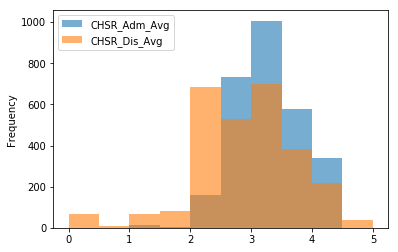

In [25]:
df[['CHSR_Adm_Avg', 'CHSR_Dis_Avg']].plot(kind='hist', alpha=0.6)

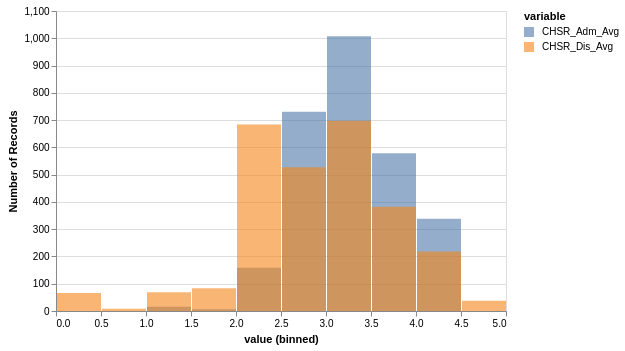

In [26]:
df[['CHSR_Adm_Avg', 'CHSR_Dis_Avg']].vgplot.hist(alpha=0.6)

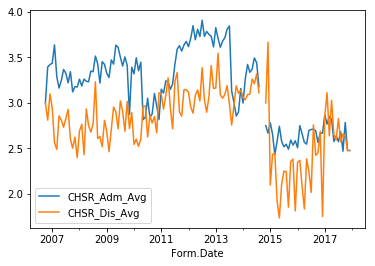

In [27]:
df.groupby([pd.Grouper(key='Form.Date', freq='M')])['CHSR_Adm_Avg', 'CHSR_Dis_Avg'].mean().plot()

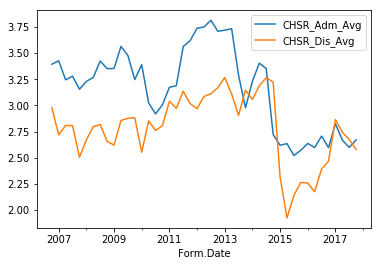

In [28]:
df.groupby([pd.Grouper(key='Form.Date', freq='Q')])['CHSR_Adm_Avg', 'CHSR_Dis_Avg'].mean().plot()

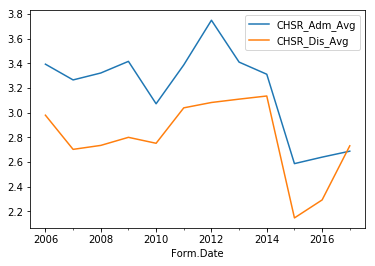

In [29]:
df.groupby([pd.Grouper(key='Form.Date', freq='Y')])['CHSR_Adm_Avg', 'CHSR_Dis_Avg'].mean().plot()

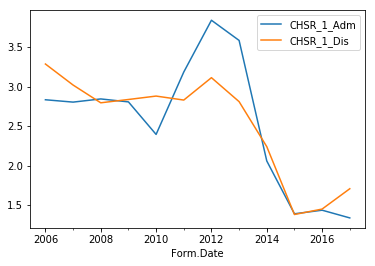

In [30]:
df.groupby([pd.Grouper(key='Form.Date', freq='Y')])['CHSR_1_Adm', 'CHSR_1_Dis'].mean().plot()

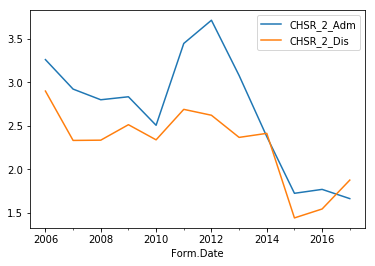

In [31]:
df.groupby([pd.Grouper(key='Form.Date', freq='Y')])['CHSR_2_Adm', 'CHSR_2_Dis'].mean().plot()

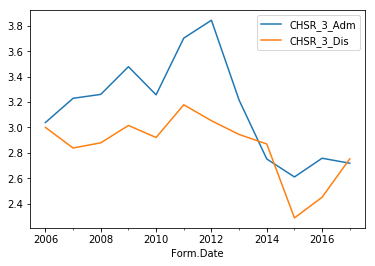

In [32]:
df.groupby([pd.Grouper(key='Form.Date', freq='Y')])['CHSR_3_Adm', 'CHSR_3_Dis'].mean().plot()

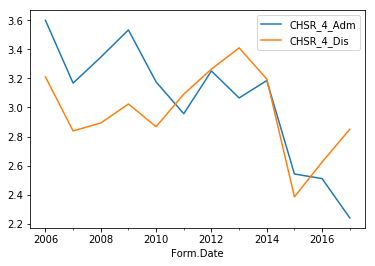

In [33]:
df.groupby([pd.Grouper(key='Form.Date', freq='Y')])['CHSR_4_Adm', 'CHSR_4_Dis'].mean().plot()

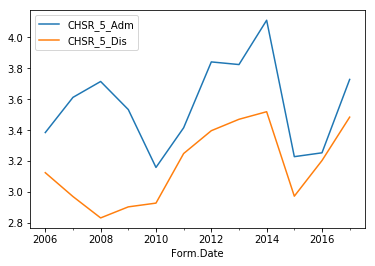

In [34]:
df.groupby([pd.Grouper(key='Form.Date', freq='Y')])['CHSR_5_Adm', 'CHSR_5_Dis'].mean().plot()

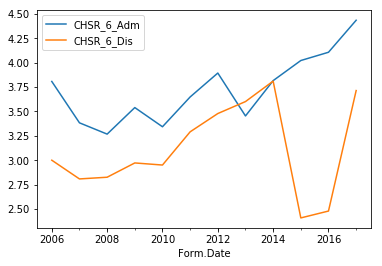

In [35]:
df.groupby([pd.Grouper(key='Form.Date', freq='Y')])['CHSR_6_Adm', 'CHSR_6_Dis'].mean().plot()

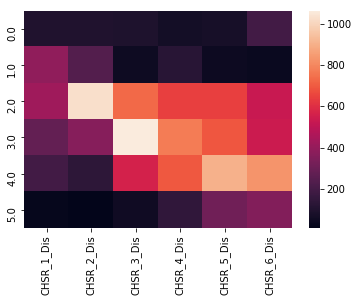

In [36]:
heatmap_data = df[['CHSR_1_Dis', 'CHSR_2_Dis', 'CHSR_3_Dis',
                   'CHSR_4_Dis', 'CHSR_5_Dis', 'CHSR_6_Dis']].apply(pd.value_counts)
sns.heatmap(heatmap_data)

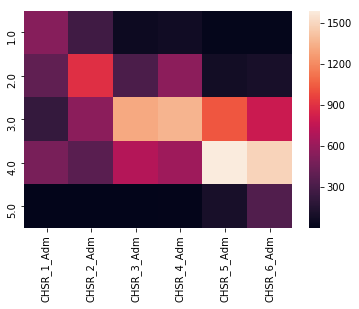

In [37]:
heatmap_data = df[['CHSR_1_Adm', 'CHSR_2_Adm', 'CHSR_3_Adm',
                   'CHSR_4_Adm', 'CHSR_5_Adm', 'CHSR_6_Adm']].apply(pd.value_counts)
sns.heatmap(heatmap_data)

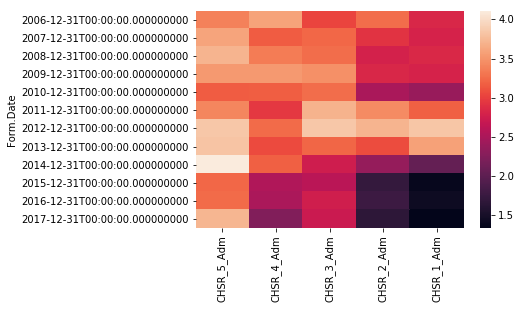

In [38]:
sns.heatmap(df.groupby([pd.Grouper(key='Form.Date', freq='Y')])
            ['CHSR_5_Adm','CHSR_4_Adm', 'CHSR_3_Adm','CHSR_2_Adm',
             'CHSR_1_Adm' ].mean())

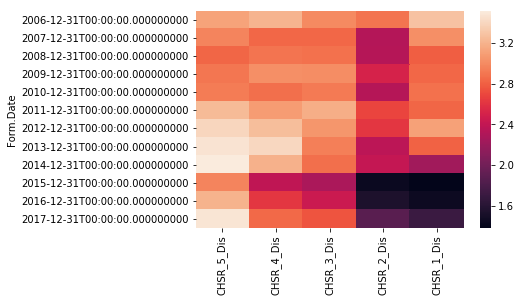

In [39]:
sns.heatmap(df.groupby([pd.Grouper(key='Form.Date', freq='Y')])
            ['CHSR_5_Dis','CHSR_4_Dis','CHSR_3_Dis', 
             'CHSR_2_Dis','CHSR_1_Dis'].mean())

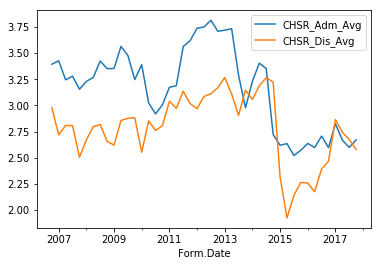

In [40]:
df.groupby([pd.Grouper(key='Form.Date', freq='Q')])['CHSR_Adm_Avg', 'CHSR_Dis_Avg'].mean().plot()

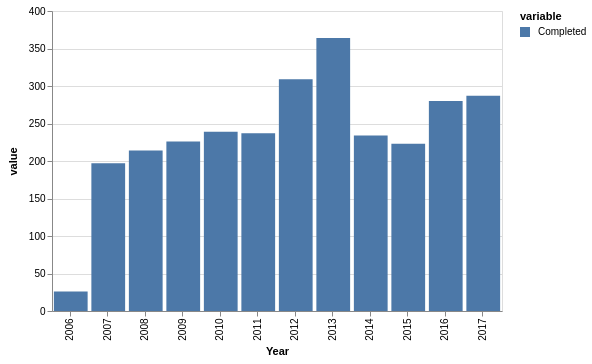

In [41]:
completions = df.groupby([pd.Grouper(key='Form.Date', freq='Y')])['Completed',].count().reset_index()
completions['Year'] = completions['Form.Date'].dt.year
completions.vgplot.bar(x='Year', y='Completed')

In [42]:
df.groupby([pd.Grouper(key='Form.Date', freq='Y')])['Client.Number'].count()

Form.Date
2006-12-31     26
2007-12-31    197
2008-12-31    214
2009-12-31    226
2010-12-31    239
2011-12-31    237
2012-12-31    309
2013-12-31    364
2014-12-31    234
2015-12-31    223
2016-12-31    280
2017-12-31    287
Freq: A-DEC, Name: Client.Number, dtype: int64

In [43]:
df[(df['Form.Date'] >= '20140101') & (df['Form.Date'] <= '20141231')].head()

,Client.Number,Form.Date,Sex.x,Race1,Number.of.arrests.in.past.30.days,Usual.living.situation,Number.of.self.help.programs.attended.in.past.30.days,Interaction.with.supportive.family.friends.in.past.30.days,Are.any.children.living.with.someone.else.due.to.CPS.court.order.or.other.action,For.how.many.children.has.the.client.lost.parental.rights,...,CHSR_5_Adm,CHSR_6_Adm,CHSR_1_Dis,CHSR_2_Dis,CHSR_3_Dis,CHSR_4_Dis,CHSR_5_Dis,CHSR_6_Dis,CHSR_Adm_Avg,CHSR_Dis_Avg
1798,4856LBJS32138,2014-01-02,Male,Caucasian White,0.0,Dependent living,No attendance,Yes,Not applicable,NaN,...,4.0,3.0,NaN,NaN,4.0,4.0,4.0,4.0,3.00,4.00
1803,5845AEAD21994,2014-01-06,Male,African American,0.0,Homeless,No attendance,Yes,Not applicable,NaN,...,5.0,4.0,3.0,3.0,3.0,3.0,5.0,4.0,3.60,3.50
1804,3521MGZC32901,2014-01-06,Male,Multiracial,1.0,Homeless,16-30 times past month (0ver 3 times per week),Yes,Not applicable,NaN,...,4.0,3.0,NaN,NaN,2.0,2.0,3.0,3.0,2.75,2.50
1805,9309CHRN24720,2014-01-07,Male,Caucasian White,0.0,Independent living,No attendance,Yes,Not applicable,NaN,...,3.0,3.0,NaN,2.0,NaN,4.0,4.0,3.0,2.60,3.25
1806,7154IROA32874,2014-01-08,Male,African,0.0,Homeless,8-15 times past month (2 or 3 times per week),Yes,Not applicable,0.0,...,4.0,4.0,NaN,2.0,3.0,2.0,2.0,3.0,3.00,2.40


In [44]:
df.groupby(['Reason.for.Discharge', pd.Grouper(key='Form.Date', freq='Y')])['Client.Number',].count().unstack().fillna(0)

Client.Number                        \
Form.Date                              2006-12-31 2007-12-31 2008-12-31   
Reason.for.Discharge                                                      
Assessed as inappropriate                     0.0        7.0        2.0   
Completed program                            17.0      123.0      130.0   
Death                                         0.0        1.0        1.0   
Incarcerated                                  1.0        0.0        2.0   
Other                                         0.0        0.0        1.0   
Patient conduct (behavioral)                  0.0        0.0        0.0   
Patient left                                  7.0       54.0       57.0   
Patient left without staff approval           0.0        0.0        0.0   
Staff requested                               1.0        6.0       18.0   
Transferred                                   0.0        6.0        1.0   
Transferred to other program                  0.0        0.0        0.0   

                                                                      \
Form.Date                           2009-12-31 2010-12-31 2011-12-31   
Reason.for.Discharge                                                   
Assessed as inappropriate                  6.0        4.0        4.0   
Completed program                        133.0      138.0      120.0   
Death                                      1.0        0.0        0.0   
Incarcerated                               5.0        4.0       10.0   
Other                                      1.0        3.0        2.0   
Patient conduct (behavioral)               0.0        0.0        0.0   
Patient left                              48.0       57.0       61.0   
Patient left without staff approval        0.0        0.0        0.0   
Staff requested                           18.0       15.0       15.0   
Transferred                                5.0       14.0       25.0   
Transferred to other program               0.0        0.0        0.0   

                                                                      \
Form.Date                           2012-12-31 2013-12-31 2014-12-31   
Reason.for.Discharge                                                   
Assessed as inappropriate                  9.0       15.0        3.0   
Completed program                        154.0      159.0       84.0   
Death                                      0.0        0.0        0.0   
Incarcerated                               3.0       10.0        5.0   
Other                                      5.0        6.0        3.0   
Patient conduct (behavioral)               0.0        0.0        1.0   
Patient left                              79.0      103.0       55.0   
Patient left without staff approval        0.0        0.0        1.0   
Staff requested                           22.0       40.0       43.0   
Transferred                               33.0       26.0       12.0   
Transferred to other program               0.0        0.0        0.0   

                                                                      
Form.Date                           2015-12-31 2016-12-31 2017-12-31  
Reason.for.Discharge                                                  
Assessed as inappropriate                  5.0        6.0        8.0  
Completed program                         70.0       64.0       75.0  
Death                                      2.0        1.0        2.0  
Incarcerated                               7.0        6.0        4.0  
Other                                      9.0       10.0        7.0  
Patient conduct (behavioral)              44.0       62.0       70.0  
Patient left                               0.0        0.0        0.0  
Patient left without staff approval       72.0       99.0       94.0  
Staff requested                            0.0        0.0        0.0  
Transferred                                0.0        0.0        0.0  
Transferred to other program              14

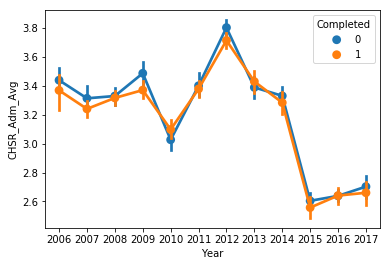

In [66]:
sns.pointplot(data=df, y='CHSR_Adm_Avg', x='Year', hue='Completed')

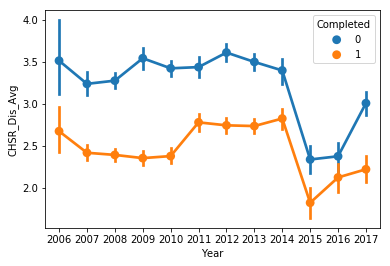

In [65]:
sns.pointplot(data=df, y='CHSR_Dis_Avg', x='Year', hue='Completed')

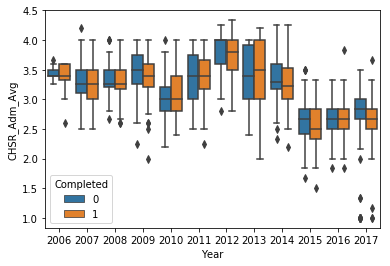

In [64]:
sns.boxplot(x='Year', y='CHSR_Adm_Avg', data=df, hue='Completed')

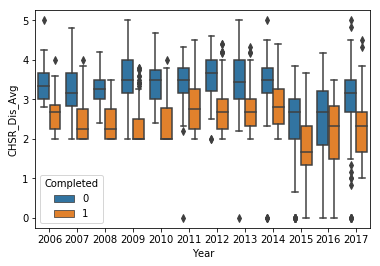

In [68]:
sns.boxplot(x='Year', y='CHSR_Dis_Avg', data=df, hue='Completed')

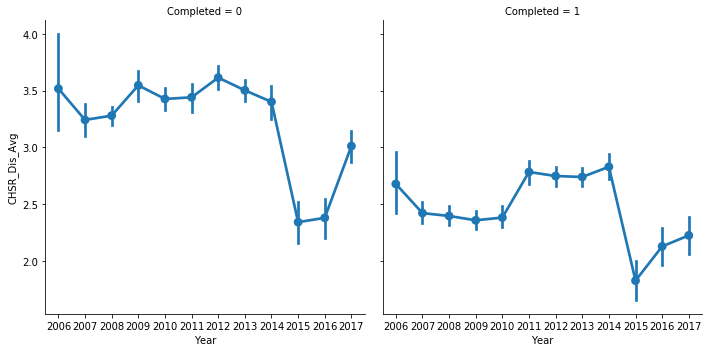

In [73]:
sns.factorplot(x='Year', y='CHSR_Dis_Avg', data=df, col='Completed', size=5)

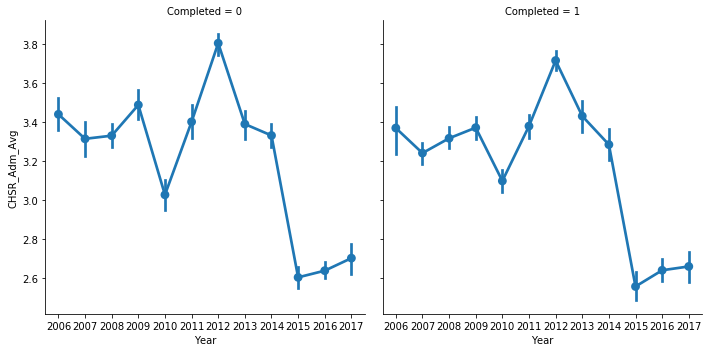

In [72]:
sns.factorplot(x='Year', y='CHSR_Adm_Avg', data=df, col='Completed', size=5)

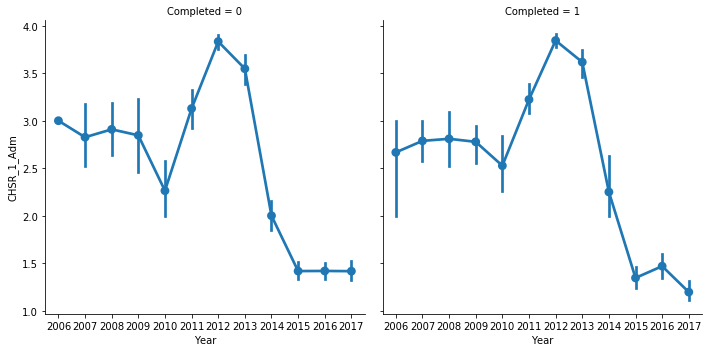

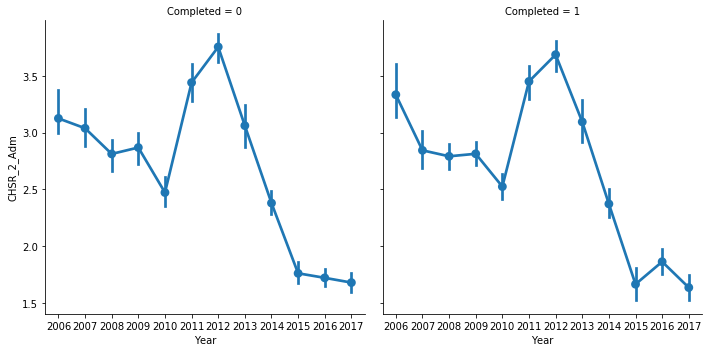

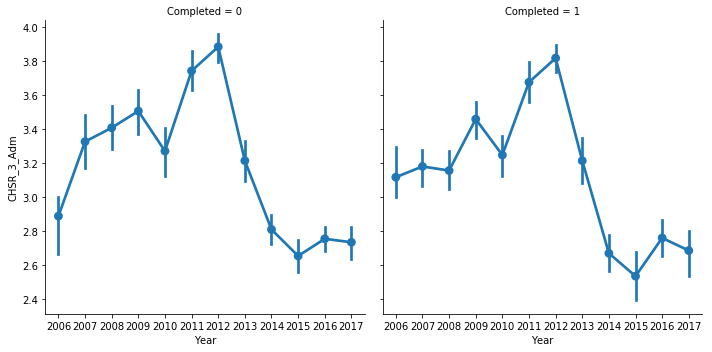

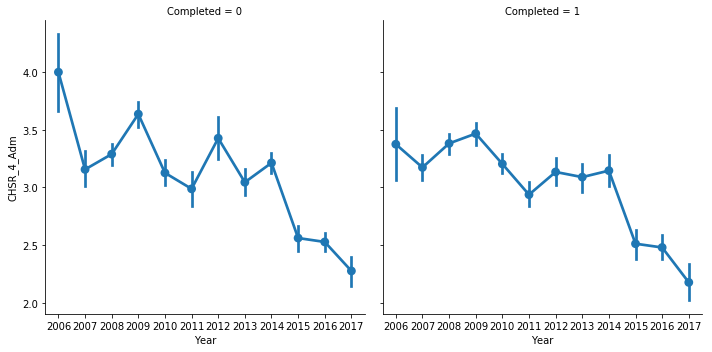

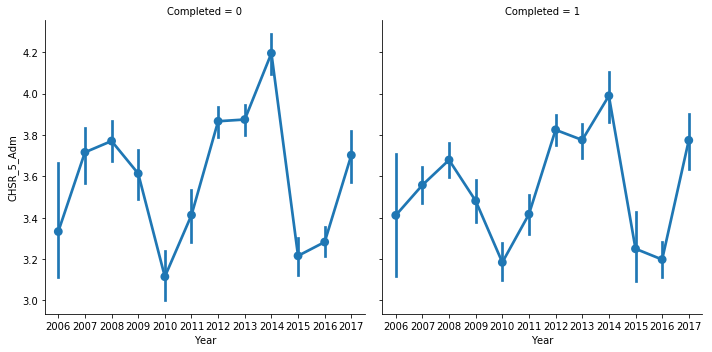

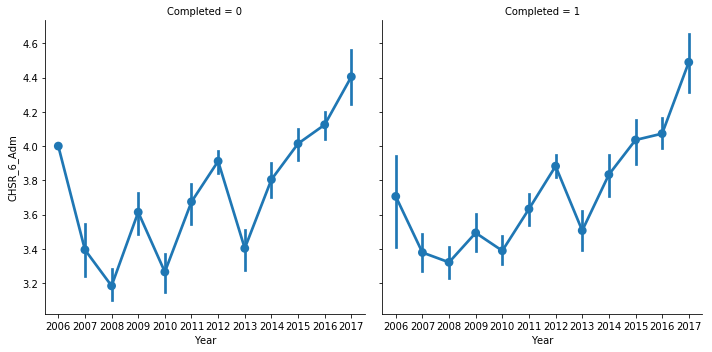

In [79]:
for label in range(1,7):
    sns.factorplot(x='Year', y=f'CHSR_{label}_Adm', data=df, col='Completed', size=5)

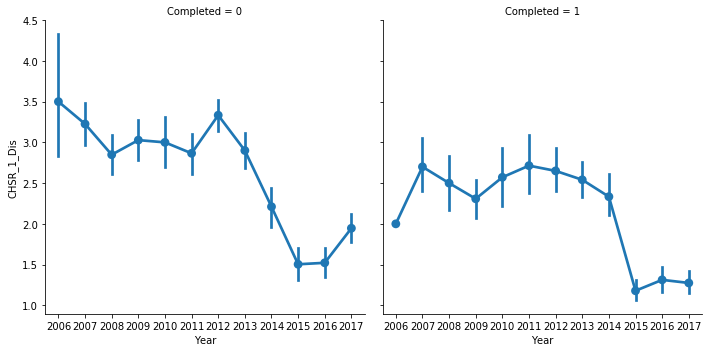

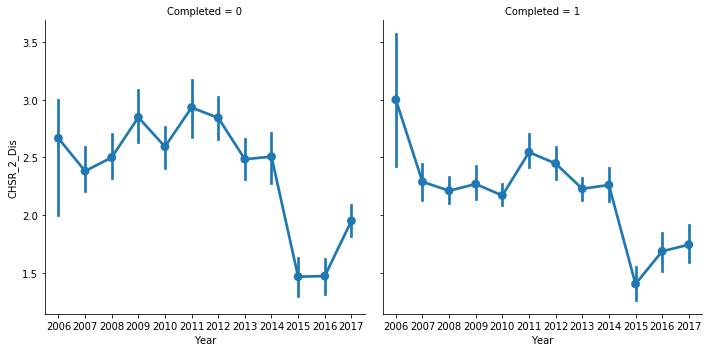

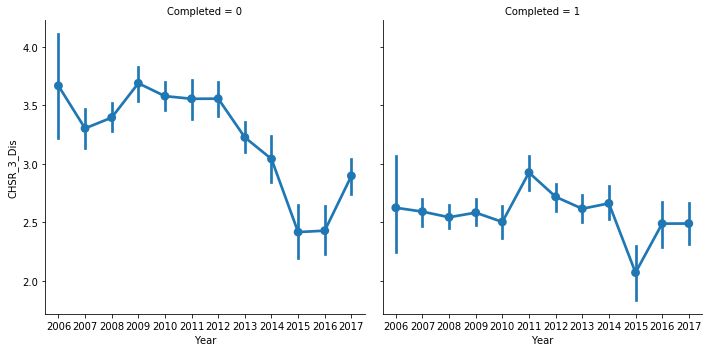

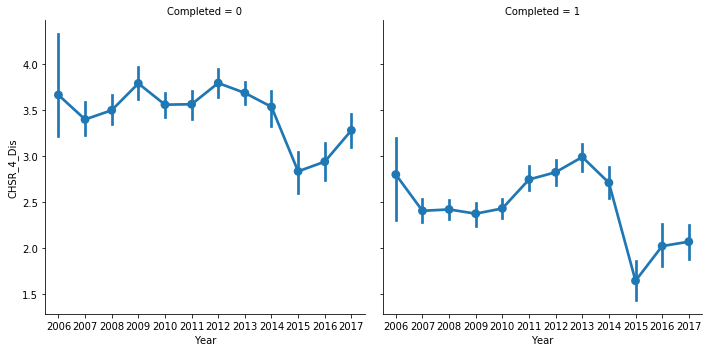

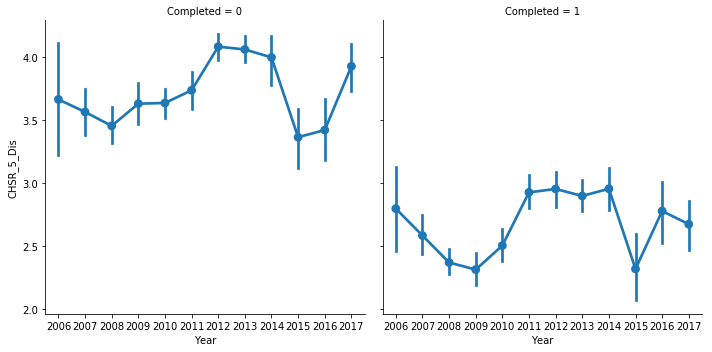

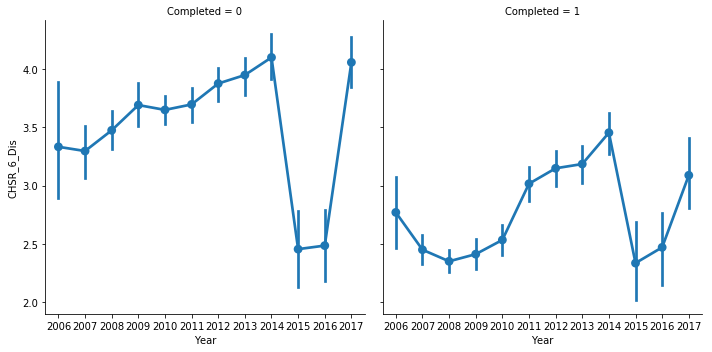

In [80]:
for label in range(1,7):
    sns.factorplot(x='Year', y=f'CHSR_{label}_Dis', data=df, col='Completed', size=5)

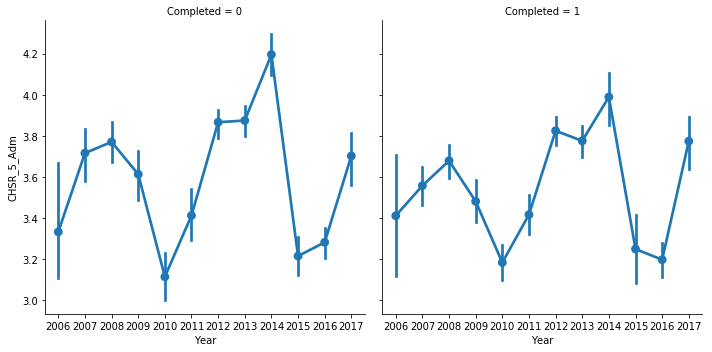

In [75]:
sns.factorplot(x='Year', y='CHSR_5_Adm', data=df, col='Completed', size=5)

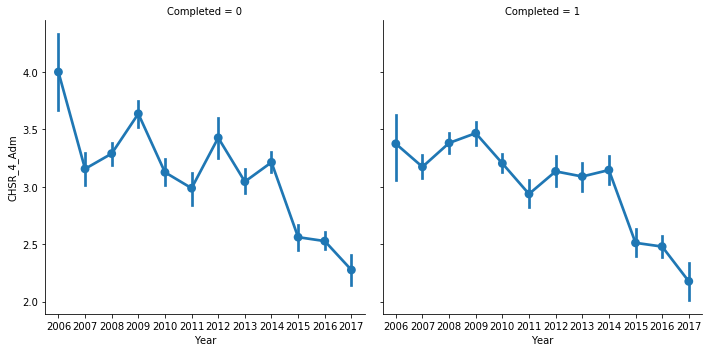

In [76]:
sns.factorplot(x='Year', y='CHSR_4_Adm', data=df, col='Completed', size=5)

In [ ]:
sns.factorplot(x='Year', y='CHSR_3_Adm', data=df, col='Completed', size=5)